[View in Colaboratory](https://colab.research.google.com/github/wo1ever/TIL/blob/master/%EC%95%88%EC%84%B8%EC%98%81_%EA%B5%AD%EB%AF%BC%EC%B2%AD%EC%9B%90_wordcloud.ipynb)

In [1]:
!pip install html5lib beautifulsoup4

In [2]:
!pip install soynlp

    100% |████████████████████████████████| 1.5MB 8.3MB/s 


In [0]:
import pandas as pd
import numpy as np
import re

In [6]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', 
                 parse_dates=['start', 'end'])

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [0]:
df.head()

In [25]:
p = r'.*(초미세먼지|미세먼지|대기오염|먼지|황사).*'
dust = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
dust.shape

(4367, 8)

In [26]:
dust.head()

,article_id,start,end,answered,votes,category,title,content
322,348,2017-08-23,2017-11-21,0,393,안전/환경,미세먼지의 주범 바이오매스 발전소 건립을 반대합니다,안녕하세요 전남 순천에 사는 시민입니다. 지금 전남 광양에 친환경 발전이라는 이름 ...
403,431,2017-08-24,2017-08-31,0,1,안전/환경,미세먼지 대책방안 및 국민건강 개선대책 방안 제안입니다.,미세먼지 대책방안 및 국민건강 개선대책 방안 제안입니다.\n미세먼지의 주요 원이 무...
597,625,2017-08-26,2017-09-02,0,163,육아/교육,천안 백석 신설초등학교 문제점,안녕하세요.\n저는 초등학교2학년을 둔 학부모 입니다.\n천안백석동 환서초등학교를 ...
645,673,2017-08-27,2017-09-03,0,616,육아/교육,"초등학교 엉터리 석면공사에도 대책없는 교육청, 바로잡아 주세요!!!",경기도 교육청에서 이번 여름방학중 진행한 과천 관문초등학교 천장 석면텍스교체공사에서...
659,687,2017-08-27,2017-09-26,0,258,안전/환경,"수원SKC화학공장, 주거지역에 24시간60DB소음발생","존경하는 우리 문재인 대통령님께.\n대통령님, 안녕하세요?\n저는 경기도 수원시 장..."


In [27]:
dust.tail()

,article_id,start,end,answered,votes,category,title,content
214977,277822,2018-06-20,2018-07-20,0,4,보건복지,각 관청에 근무하시는 공무원님들 보세요ᆢ,"저는 업무 특성상 자주 시청이나 구청, 군청 민원실을 방문합니다ᆢ 가는 여러 곳 시..."
214999,277847,2018-06-20,2018-07-20,0,2,보건복지,무분별한 허리시술 허위진단,제발도와주세요~~안녕하세요 저는 40세 미래를위해 꿈을 위해 그저 평범하게 일만...
215059,277927,2018-06-20,2018-07-20,0,5,안전/환경,미세먼지. 강력한 방안마련 해주세요!,한중일 연구도 중국측의 반대로 무기 연기되었고\n중국측과 체결한 집진장치 설치도 거...
215088,277965,2018-06-20,2018-07-20,0,77,안전/환경,중국발 (초)미세먼지에 대해 중국에 강력하게 항의하고 근본적인 대책을 요구합니다.,안녕하세요.\n저는 미세먼지와 관련해 중국에 항의하는 지난 국민청원에 동의했던 국민...
215142,278031,2018-06-20,2018-07-20,0,3396,성장동력,탈 원전 정책 반대 합니다,대선 공약이라도\n잘 못된 선택이라 판단되면 철회 하는 용기도 필요 합니다\n우리나...


In [28]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [0]:
sample_index = 215088

In [32]:
sample_title = dust['title'][sample_index]
sample_title

'중국발 (초)미세먼지에 대해 중국에 강력하게 항의하고 근본적인 대책을 요구합니다.'

In [34]:
sample_content = dust['content'][sample_index]
sample_content

"안녕하세요.\\n저는 미세먼지와 관련해 중국에 항의하는 지난 국민청원에 동의했던 국민입니다.\\n이후 해당 청원의 답변도 보았고 의문이 가는 부분들이 있었지만 한중일 미세먼지 보고서가 내달(답변 당시 기준) 나온다는 김혜애 비서관님의 말을 듣고 상황이 나아지기를 기대했습니다.\\n하지만 어제(6/19) 중국의 거부로 보고서가 무기한 연기되었다는 기사를 접했습니다.\\n이제 중국과의 협력, 연구, 논의를 통해 (초)미세먼지 문제를 해결할 단계는 지났습니다.\\n잘 해결될 사안이면 진작 원만하게 해결됐을 것이고, 중국과의 협력을 통한 해답은 더이상 보이지 않습니다.\\n이제 중국에게 제재, 압력, 항의를 통해 해결해야 합니다.\\n이전 청원에 대한 답변에서 김혜애 비서관님이 (초)미세먼지의 요인 중 국내외가 각각 50%를 차지하기에 국내적 노력도 필요하다고 마무리했습니다.\\n국내에서 노력해서 50% 중 30%(환경부 명시 미세먼지 감축 목표)를 저감한다고 한들 중국에서 50%가 날아오면 총 수치는 70%가 됩니다.\\n그럼 국내적 노력이 무슨 소용이 있나요?\\n마스크를 쓰고, 환기도 마음껏 못 시키고, 목 아프고, 눈 가렵고, 일상생활에 제약을 받는 상황은 나아지지 않습니다.\\n본질적인 요인을 해결하지 않고 국민들의 적극적인 이해와 동참만을 말하기 때문에 정부 및 관계부처의 말이 납득이 가지 않는 것입니다.\\n환경부 홈페이지에도 고농도 미세먼지가 발생했을 때 국외 요인이 60~80%라고 명시돼있는데 왜 국내 노력만을 강조합니까.\\n이번 주말에도 중국발 (초)미세먼지로 대기질 '매우 나쁨'이 예상됩니다.\\n다시 한 번 (초)미세먼지 대책과 관련해 중국에 강력하게 항의하는 것을 정부 및 관계부처에 요구합니다."

In [36]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['중국발',
 '(',
 '초',
 ')',
 '미세먼지에',
 '대해',
 '중국에',
 '강력하게',
 '항의하고',
 '근본적인',
 '대책을',
 '요구합니다',
 '.']

In [37]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['안녕하세요', '.\\', 'n', '저는', '미세먼지와', '관련해', '중국에', '항의하는', '지난', '국민청원에']

In [38]:
print(len(tokened_title))
print(len(tokened_content))

13
262


In [0]:
def preprocessing(text):
  text = re.sub('\\\\n', ' ', text)
  return text

In [60]:
%time sentences = care['content'].apply(preprocessing)

CPU times: user 54.6 ms, sys: 10.1 ms, total: 64.7 ms
Wall time: 67.8 ms


In [61]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 17.2 s, sys: 11.6 ms, total: 17.2 s
Wall time: 17.2 s


1     [현, 정부에, 국민들이, 가장, 원하는, 것은, 부패척결입니다, ., 우리, 사회...
3     [현정부에서, 정규직, 일자리를, 늘리는, 것에, 찬성합니다, ., 그런데, 공공기...
15    [문재인, 대통령님과, 각, 정부, 인사분들께, 마음속, 깊이, 존경과, 감사를, ...
Name: content, dtype: object

In [44]:
tokens[sample_index][:10]

['안녕하세요', '.', '저는', '미세먼지와', '관련해', '중국에', '항의하는', '지난', '국민청원에', '동의했던']

In [0]:
!pip install wordcloud

In [74]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

import os

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height = 600):
    wordcloud = WordCloud(
                         font_path = '/Library/Fonts/NanumBarunGothic.ttf',
                         stopwords = STOPWORDS, 
                         background_color = backgroundcolor,
                           width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

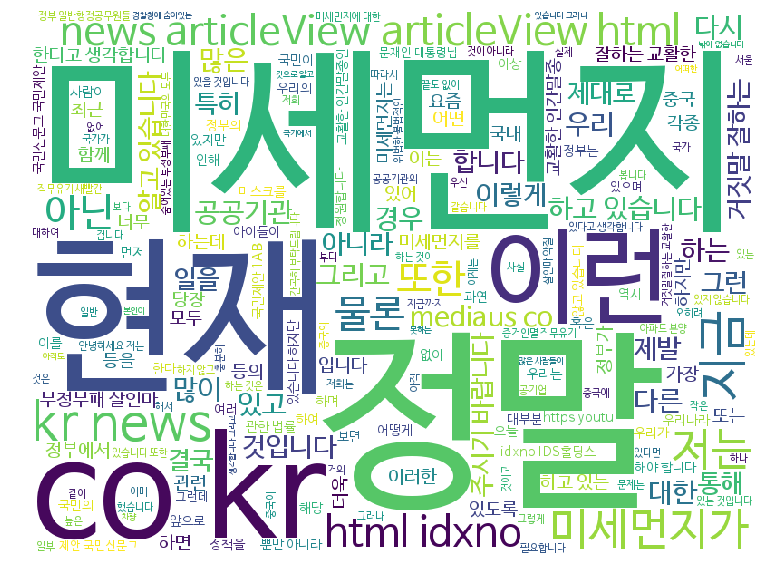

CPU times: user 21.1 s, sys: 1.05 s, total: 22.2 s
Wall time: 22.1 s


In [76]:
%time displayWordCloud(' '.join(sentences))

In [0]:
from soynlp.noun import LRNounExtractor

In [81]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (132004, 67817) tokens
building lr-graph completedCPU times: user 24.6 s, sys: 70.5 ms, total: 24.7 s
Wall time: 24.7 s


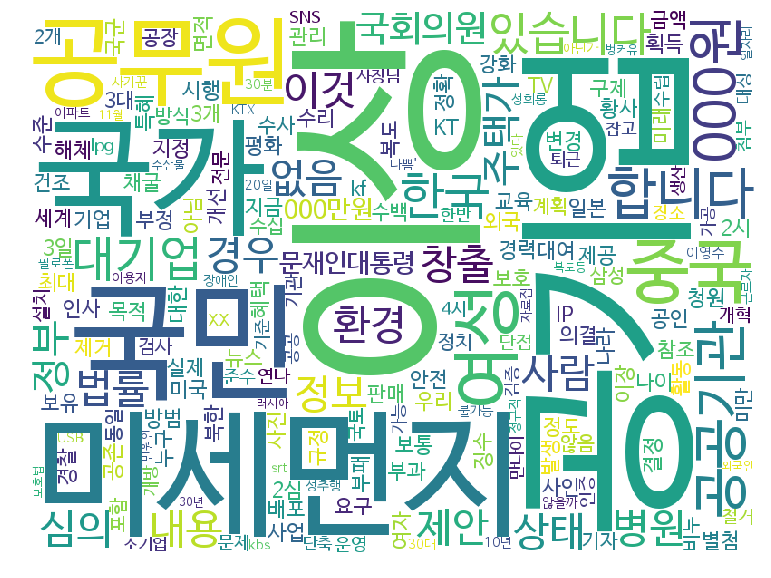

CPU times: user 1.57 s, sys: 313 ms, total: 1.89 s
Wall time: 1.82 s


In [82]:
%time displayWordCloud(' '.join(nouns))